## Importing Libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

## Importing dataset and splitting into predictors and target variable 

In [2]:
df=pd.read_csv('train.csv')
x=df.iloc[:,:-1].values
y=df.iloc[:,-1:].values

## Imputing for missing Values

In [3]:
from sklearn.impute import SimpleImputer
si=SimpleImputer(missing_values=np.nan,strategy='mean')
x=si.fit_transform(x)

## Splitting into train test set

In [4]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
sc_y=StandardScaler()

x_train=sc_x.fit_transform(x_train)
x_test=sc_x.transform(x_test)
y_train=sc_y.fit_transform(y_train)
y_test=sc_y.transform(y_test)

## Training Polynomial Model

In [5]:
from sklearn.preprocessing import PolynomialFeatures
pf=PolynomialFeatures(degree=2)
x_train_poly=pf.fit_transform(x_train)
x_test_poly=pf.transform(x_test)

from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train_poly,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


## predicting Y

In [6]:
y_pred=lr.predict(x_test_poly)

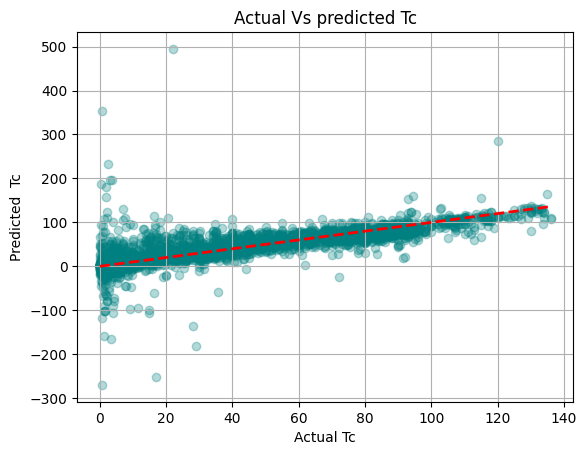

In [26]:
actual=sc_y.inverse_transform(y_test)
predicted=sc_y.inverse_transform(y_pred)

plt.figure()
plt.scatter(actual,predicted,c='teal',alpha=0.3)
plt.plot([actual.min(),actual.max()],[actual.min(),actual.max()],'r--',lw=2, label='Perfect Prediction Line')
plt.grid(True)
plt.xlabel("Actual Tc")
plt.ylabel("Predicted  Tc")
plt.title("Actual Vs predicted Tc")
plt.show()


## R2 and RMSE 

In [28]:
from sklearn.metrics import r2_score,root_mean_squared_error
r2=r2_score(y_true=y_test,y_pred=y_pred)
print(r2)

rmse=root_mean_squared_error(y_true=actual,y_pred=predicted)
print(rmse)

0.5866104715591104
21.93504668160435


## with PCA

In [9]:
from sklearn.decomposition import PCA
pca=PCA(n_components=0.95)

x_train_pca=pca.fit_transform(x_train)
x_test_pca=pca.transform(x_test)
print(pca.explained_variance_ratio_)

[0.39019986 0.1042054  0.0953871  0.07934556 0.05822511 0.03770805
 0.03631953 0.0309735  0.02370823 0.01966187 0.01828411 0.0146574
 0.01174232 0.00996182 0.00987848 0.00790938 0.0072004 ]


## fitting a polynomial model

In [21]:
from sklearn.preprocessing import PolynomialFeatures
pf_pca=PolynomialFeatures(degree=2)
x_train_pca_poly=pf_pca.fit_transform(x_train_pca)
x_test_pca_poly=pf_pca.transform(x_test_pca)

from sklearn.linear_model import LinearRegression
lr_pca=LinearRegression()
lr_pca.fit(x_train_pca_poly,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


## predicting Y

In [22]:
y_pred_pca=lr_pca.predict(x_test_pca_poly)


## Plotting actual vs predicted values 

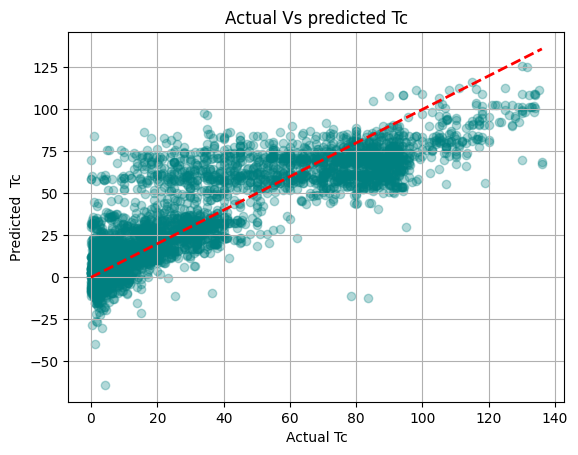

In [27]:
actual_pca=sc_y.inverse_transform(y_test)
predicted_pca=sc_y.inverse_transform(y_pred_pca)

plt.figure()
plt.scatter(actual_pca,predicted_pca,c='teal',alpha=0.3)
plt.plot([actual_pca.min(),actual_pca.max()],[actual_pca.min(),actual_pca.max()],'r--',lw=2, label='Perfect Prediction Line')
plt.grid(True)
plt.xlabel("Actual Tc")
plt.ylabel("Predicted  Tc")
plt.title("Actual Vs predicted Tc")
plt.show()


## R2 and RMSE

In [24]:
from sklearn.metrics import r2_score,root_mean_squared_error
r2_pca=r2_score(y_true=actual_pca,y_pred=predicted_pca)
print(r2_pca)

rmse_pca=root_mean_squared_error(y_true=actual_pca,y_pred=predicted_pca)
print(rmse_pca)

0.7404030781784201
17.38235425166958
